# Explore here

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#No hay nulos

In [4]:
df.drop_duplicates(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
for columna in df.columns: 
    if df[columna].dtype not in ('int64','float64'):
        df[columna] = pd.factorize(df[columna])[0]

df.info()

#ahora todas las columnas son numericas


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


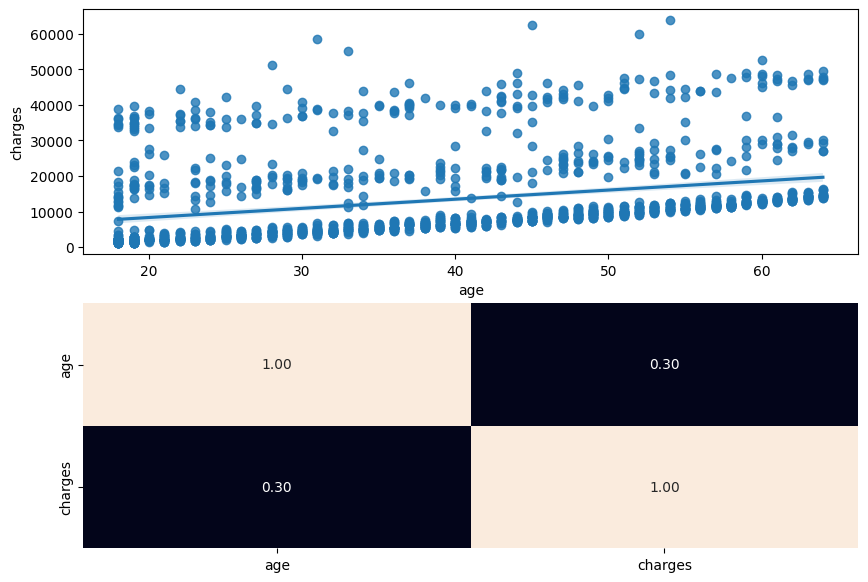

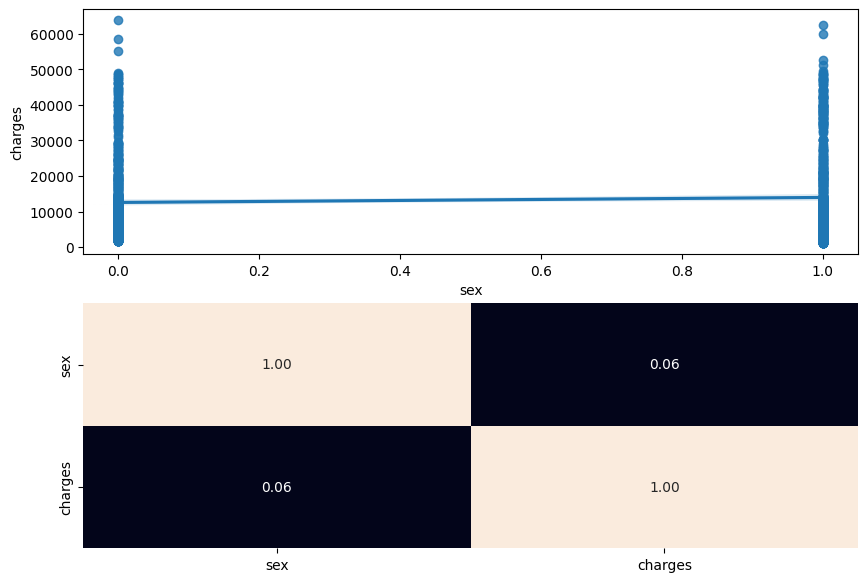

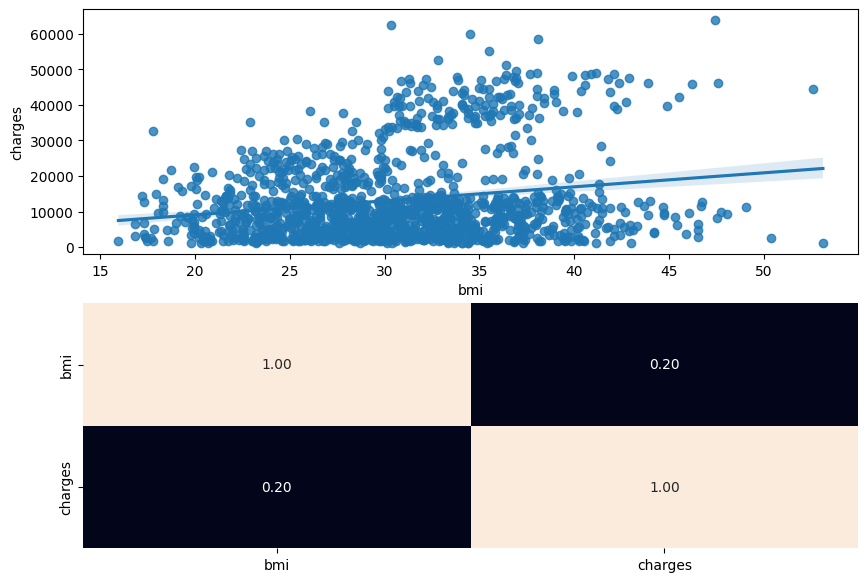

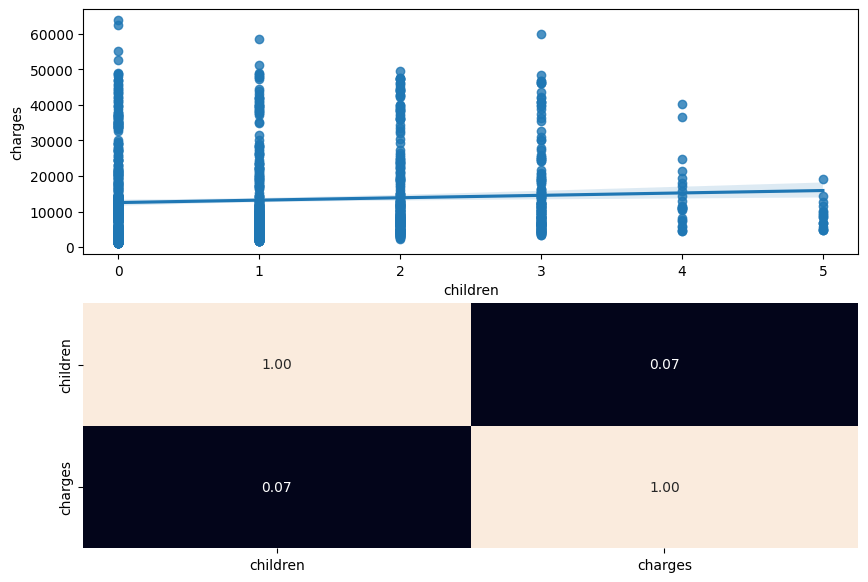

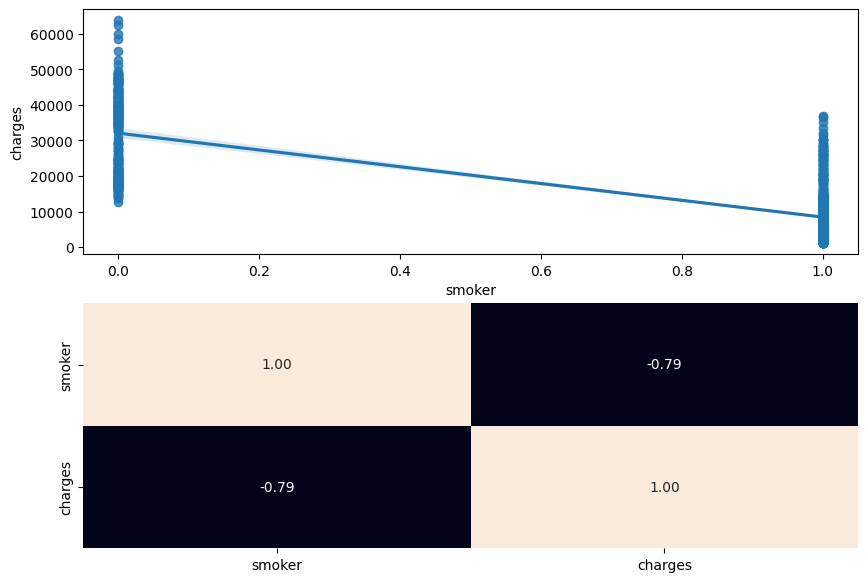

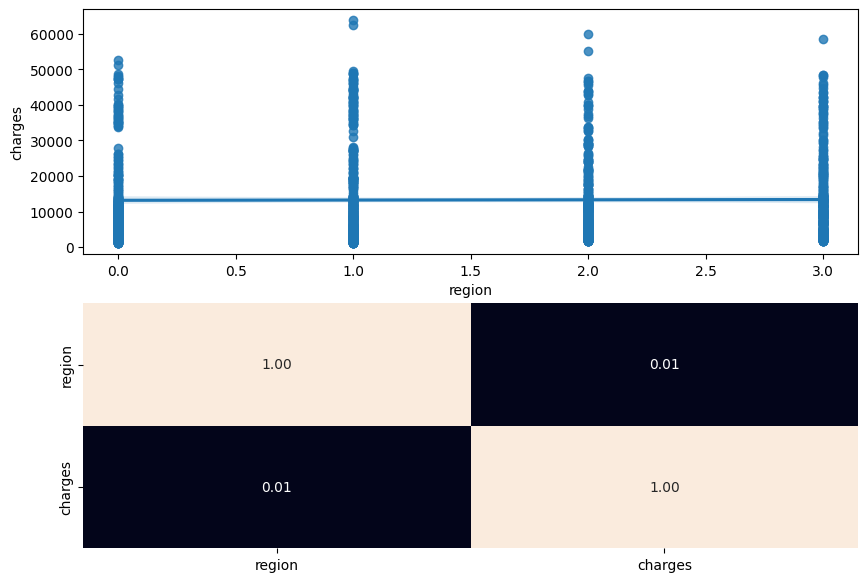

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# charges es la columna objetiva o Y
for columna in df.columns: 
    if columna not in ('charges'):
        fig, axis = plt.subplots(2, 1, figsize =(10, 7))
        sns.regplot(df,x=columna,y='charges',ax=axis[0])
        sns.heatmap(df[[columna, 'charges']].corr(), annot = True, fmt = ".2f", ax=axis[1], cbar = False)
        plt.show()




In [12]:
X = df[['smoker','age','bmi']]
y = df['charges']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.head()



,smoker,age,bmi
1114,1,23,24.510
968,1,21,25.745
599,1,52,37.525
170,1,63,41.470
275,1,47,26.600


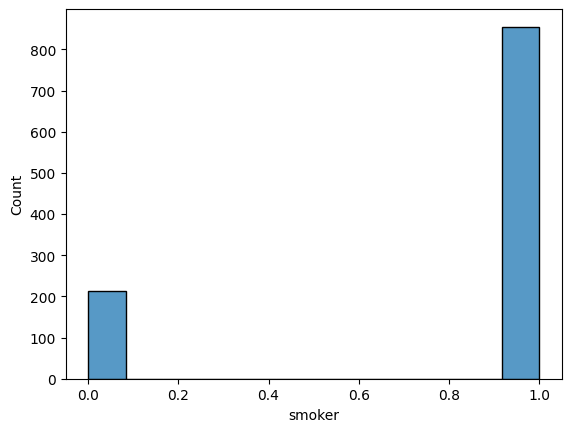

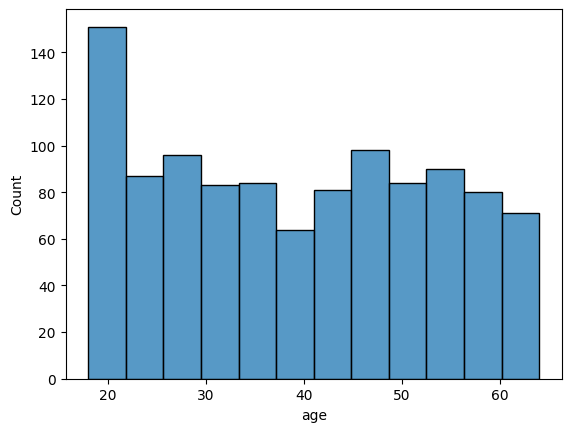

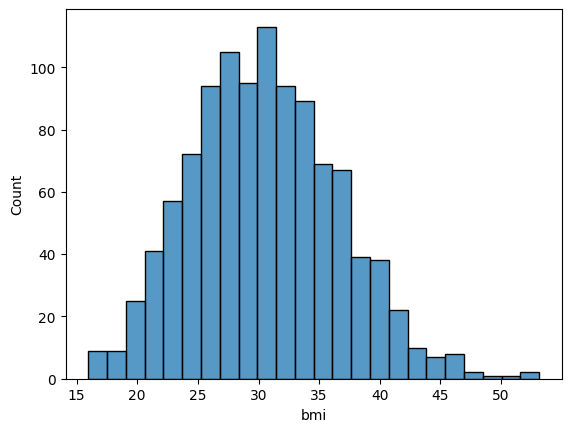

In [13]:
for columna in X_train.columns: 
    sns.histplot(X_train, x=columna)
    plt.show()
    

# No todas las variables son Normales, solamente una, por lo tanto utilizamos un MinMaxScaler - si la mayoria fueran Normal usariamos un standard scaler.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_esc = scaler.fit_transform(X_train, y_train)
X_test_esc = scaler.transform(X_test)

X_train_esc = pd.DataFrame(X_train_esc, columns=X_train.columns, index=X_train.index)
X_test_esc = pd.DataFrame(X_test_esc, columns=X_test.columns, index=X_test.index)

X_train_esc.head()




,smoker,age,bmi
1114,1.0,0.108696,0.230024
968,1.0,0.065217,0.263250
599,1.0,0.739130,0.580172
170,1.0,0.978261,0.686306
275,1.0,0.630435,0.286252


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_esc, y_train)

print(f"El intercepto es (a): {model.intercept_}")
print(f"Los coeficientes son (b1, b2, b3): {model.coef_}")



El intercepto es (a): 21701.79391257019
Los coeficientes son (b1, b2, b3): [-23074.26173498  11586.30415359  11329.51105637]


El intercepto es la base, es decir comenzamos con un charge de 21000$ y ser fumador tiene una correlación negativa, según los resultados, ser fumador te aumenta el Y o Charges, y no ser fumador lo disminuye - por razones obvias, por edad se suma y por cada punto de BMI se le suma (los valores en los coeficientes) 


In [17]:
y_pred = model.predict(X_test_esc)
y_pred


array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

In [18]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(f'El error cuadratico medio en raiz es o RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'El R2 score es: {r2_score(y_test, y_pred)}')



El error cuadratico medio en raiz es o RMSE: 5986.783344847843
El R2 score es: 0.8049502474643171


Tenemos un RMSE de aprox $6000 lo que significa que el error promedio en las predicciones de Y estan en +/- $6000 
Tenemos un R2 de 80,49% lo que significa que un el modelo explica el 80% de los datos con las 3 variables que escogimos de X. 

In [19]:
from pickle import dump

dump(model,open('../models/linear_regression.model', 'wb'))

